In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.rcParams.update({"font.family": "Fira Sans Compressed"})

In [3]:
animal_rescues = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-06-29/animal_rescues.csv")

animal_rescues["animal_group_parent"] = animal_rescues["animal_group_parent"].str.capitalize()

In [4]:
animal_rescues.head()

,incident_number,date_time_of_call,cal_year,fin_year,type_of_incident,pump_count,pump_hours_total,hourly_notional_cost,incident_notional_cost,final_description,...,uprn,street,usrn,postcode_district,easting_m,northing_m,easting_rounded,northing_rounded,latitude,longitude
0,139091.0,01/01/2009 03:01,2009,2008/09,Special Service,1.0,2.0,255,510.0,Redacted,...,NaN,Waddington Way,20500146.0,SE19,NaN,NaN,532350,170050,NaN,NaN
1,275091.0,01/01/2009 08:51,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,...,NaN,Grasmere Road,NaN,SE25,534785.0,167546.0,534750,167550,51.390954,-0.064167
2,2075091.0,04/01/2009 10:07,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,...,NaN,Mill Lane,NaN,SM5,528041.0,164923.0,528050,164950,51.368941,-0.161985
3,2872091.0,05/01/2009 12:27,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,...,1.000210e+11,Park Lane,21401484.0,UB9,504689.0,190685.0,504650,190650,51.605283,-0.489684
4,3553091.0,06/01/2009 15:23,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,...,NaN,Swindon Lane,21300122.0,RM3,NaN,NaN,554650,192350,NaN,NaN


In [5]:
gb_london_boroughs_grid = pd.read_csv("https://raw.githubusercontent.com/hafen/grid-designer/master/grids/gb_london_boroughs_grid.csv")

borough_names = gb_london_boroughs_grid.rename(columns={"code_ons": "borough_code"})
borough_names.head()

,row,col,borough_code,name
0,4,5,E09000001,City of London
1,4,8,E09000002,Barking and Dagenham
2,2,4,E09000003,Barnet
3,5,8,E09000004,Bexley
4,3,3,E09000005,Brent


In [6]:
rescues_borough = animal_rescues.query("cal_year < 2021").reset_index()
rescues_borough["animal_group_parent"] = np.where(
    rescues_borough["animal_group_parent"] == "Cat", "Cat", "Not_Cat"
)

rescues_borough = (
    rescues_borough.groupby(["cal_year", "borough_code", "animal_group_parent"])
    .size()
    .to_frame("n")
    .reset_index()
)

rescues_borough = rescues_borough[rescues_borough["animal_group_parent"].isin(["Cat", "Not_Cat"])]

rescues_borough = rescues_borough.pivot(
    index=["cal_year", "borough_code"], 
    columns="animal_group_parent", 
    values="n"
).reset_index()

rescues_borough = pd.merge(rescues_borough, borough_names, how="left", on="borough_code")
rescues_borough = rescues_borough.dropna(subset=["name"])

In [7]:
rescues_borough["row"] -= 1
rescues_borough["col"] -= 1

In [8]:
df_idxs = rescues_borough[["row", "col", "name"]].drop_duplicates()

In [9]:
NAMES = df_idxs["name"].values
ROWS = df_idxs["row"].values.astype(int)
COLS = df_idxs["col"].values.astype(int)

In [10]:
NROW = len(rescues_borough["row"].unique())
NCOL = len(rescues_borough["col"].unique())

In [11]:

df

,cal_year,borough_code,Cat,Not_Cat,row,col,name
9,2009,E09000010,6.0,19.0,0.0,4.0,Enfield
42,2010,E09000010,8.0,17.0,0.0,4.0,Enfield
75,2011,E09000010,9.0,16.0,0.0,4.0,Enfield
110,2012,E09000010,15.0,13.0,0.0,4.0,Enfield
144,2013,E09000010,10.0,7.0,0.0,4.0,Enfield
178,2014,E09000010,11.0,15.0,0.0,4.0,Enfield
212,2015,E09000010,12.0,15.0,0.0,4.0,Enfield
245,2016,E09000010,13.0,17.0,0.0,4.0,Enfield
277,2017,E09000010,11.0,8.0,0.0,4.0,Enfield
310,2018,E09000010,14.0,20.0,0.0,4.0,Enfield


In [18]:
BLUE = "#3D85F7"
BLUE_LIGHT = "#5490FF"
PINK = "#C32E5A"
PINK_LIGHT = "#D34068"
GREY40 = "#666666"
GREY25 = "#404040"
GREY20 = "#333333"
BACKGROUND = "#F5F4EF"

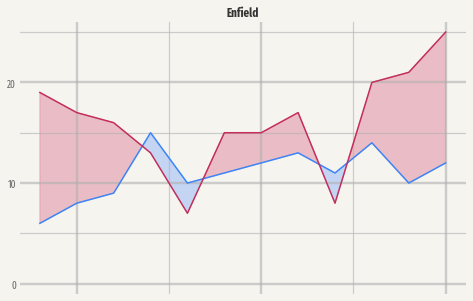

In [24]:
fig, ax = plt.subplots(figsize=(8, 5))

df = rescues_borough[rescues_borough["name"] == "Enfield"]

YEAR = df["cal_year"].values
CAT = df["Cat"].values
NOT_CAT = df["Not_Cat"].values

ax.plot(YEAR, CAT, color=BLUE)
ax.plot(YEAR, NOT_CAT, color=PINK)

# For conditional fill with different colors we need more than
# one `ax.fill_between` statement.
ax.fill_between(
    YEAR, CAT, NOT_CAT, where=(CAT > NOT_CAT), 
    interpolate=True, color=BLUE_LIGHT, alpha=0.3
)

ax.fill_between(
    YEAR, CAT, NOT_CAT, where=(CAT <= NOT_CAT),
    interpolate=True, color=PINK_LIGHT, alpha=0.3
);

ax.set_facecolor(BACKGROUND)
fig.set_facecolor(BACKGROUND)

yticks = [0, 10, 20]
ax.set_yticks(yticks)
ax.set_yticklabels(
    yticks, color=GREY40, #fontname="Hydrophilia Iced", size=9
)

ax.yaxis.set_tick_params(which="both", length=0)
ax.xaxis.set_tick_params(which="both", length=0)
ax.set_xticklabels([])

ax.spines["left"].set_color("none")
ax.spines["bottom"].set_color("none")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

ax.set_xticks([2010, 2015, 2020])
ax.set_xticks([2012.5, 2017.5], minor=True)

ax.set_yticks([0, 10, 20])
ax.set_yticks([5, 15, 25], minor=True)
ax.set_ylim((-1, 26))

ax.grid(which="minor", lw=0.6, alpha=0.6)
ax.grid(which="major", lw=1.2, alpha=0.6)

ax.set_title("Enfield", weight="bold", color=GREY20);

In [85]:
def single_plot(x, y1, y2, name, ax):

    ax.plot(x, y1, color=BLUE, label="cats")
    ax.plot(x, y2, color=PINK, label="other")

    # For conditional fill with different colors we need more than
    # one `ax.fill_between` statement.
    ax.fill_between(
        x, y1, y2, where=(y1 > y2), 
        interpolate=True, color=BLUE_LIGHT, alpha=0.3
    )

    ax.fill_between(
        x, y1, y2, where=(y1 <= y2),
        interpolate=True, color=PINK_LIGHT, alpha=0.3
    );

    ax.set_facecolor(BACKGROUND)
    fig.set_facecolor(BACKGROUND)

    
    xticks = []
    ax.set_xticklabels([])
    

    ax.yaxis.set_tick_params(which="both", length=0)
    ax.xaxis.set_tick_params(which="both", length=0)
    

    ax.spines["left"].set_color("none")
    ax.spines["bottom"].set_color("none")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    
    xticks = [2010, 2015, 2020]
    ax.set_xticks(xticks)
    ax.set_xticks([2012.5, 2017.5], minor=True)
    ax.set_xticklabels(xticks, color=GREY40, size=10)

    yticks = [0, 10, 20]
    ax.set_yticks(yticks)
    ax.set_yticks([5, 15, 25], minor=True)
    ax.set_yticklabels(yticks, color=GREY40, size=10)
    ax.set_ylim((-1, 26))

    ax.grid(which="minor", lw=0.4, alpha=0.4)
    ax.grid(which="major", lw=0.8, alpha=0.4)
    
    ax.set_title(name, weight="bold", size=9, color=GREY20)

In [99]:
from matplotlib.lines import Line2D

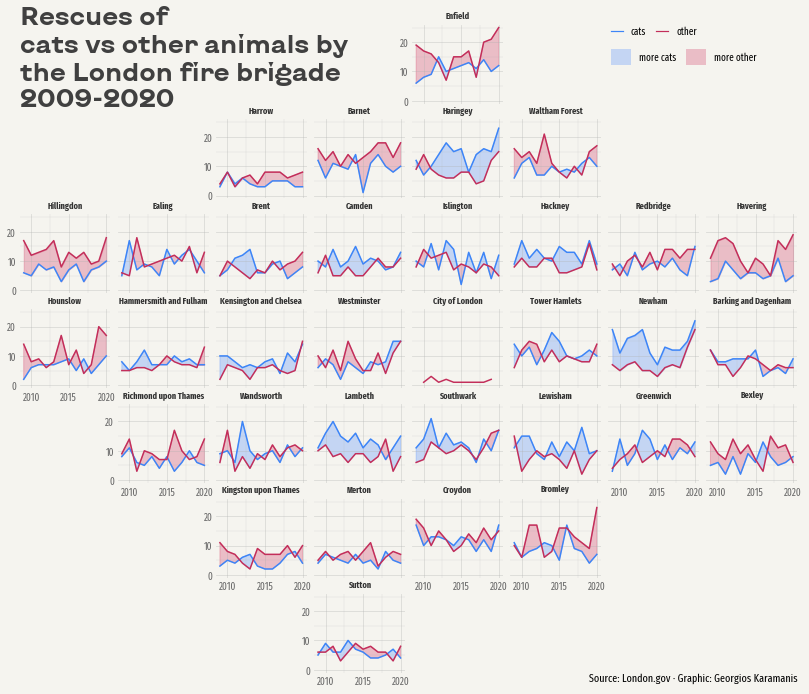

In [138]:
fig, axes = plt.subplots(NROW, NCOL, figsize=(12, 10), sharex=True, sharey=True)

for i, name in enumerate(NAMES):
    df = rescues_borough[rescues_borough["name"] == name]
    ax = axes[ROWS[i], COLS[i]]
    
    df = rescues_borough[rescues_borough["name"] == name]
    YEAR = df["cal_year"].values
    CAT = df["Cat"].values
    NOT_CAT = df["Not_Cat"].values
    
    single_plot(YEAR, CAT, NOT_CAT, name, ax)

    
for i in range(7):
    first_in_row = True
    for j in range(8):
        if axes[i, j].lines:
            if first_in_row:
                axes[i, j].yaxis.set_tick_params(labelleft=True)
                first_in_row = False
            continue
        else:
            axes[i, j].remove()


for j in range(8):
    first_in_col = True
    for i in reversed(range(7)):
        if axes[i, j].lines:
            if first_in_col:
                axes[i, j].xaxis.set_tick_params(labelbottom=True)
                first_in_col = False
                

handles = [
    Line2D([], [], c=color, lw=1.2, label=label)
    for label, color in zip(["cats", "other"], [BLUE, PINK])
]

import matplotlib.patches as mpatches



fig.legend(
    handles=handles,
    loc=(0.75, 0.94),
    ncol=2,
    frameon=False,
    handlelength=1.2,
    columnspacing=1
)


cats = mpatches.Patch(facecolor=BLUE_LIGHT, alpha=0.3, label="more cats")
other = mpatches.Patch(facecolor=PINK_LIGHT, alpha=0.3,label="more other")

fig.legend(
    handles=[cats, other],
    loc=(0.75, 0.9), 
    ncol=2,
    frameon=False,
    handlelength=2,
    handleheight=2,
    columnspacing=1
)

fig.text(
    x=0.05, 
    y=0.975,
    s="Rescues of\ncats vs other animals by\nthe London fire brigade\n2009-2020",
    color=GREY25,
    ha="left",
    va="top",
    ma="left",
    fontsize=26, 
    fontfamily="KyivType Sans", 
    fontweight="bold"
)

fig.text(
    x=0.95, 
    y=0.05,
    s="Source: London.gov · Graphic: Georgios Karamanis",
    ha="right",
    va="top",
    fontsize=11, 
)

fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.08)
fig.savefig("plot.png", dpi=300)